# Data Science Notes

## Framework

# Machine Learning Book Notes + Code

## Chapter 5

### PCA (Principal Component Analysis)

Method of Feature Extraction using PCA:

- identification of high variance "principal components" (i.e. directions of maximum variance within a dataset)
- transformation of the original dataset, of dimension d, to only include the k components with maximum variance
    - This is done with a transformation matrix that is dxk
- VERY sensitive to non-standardized data
    
Algorithm:

- Standardize and then construct covv matrix of D (n x d)
- find eigendecomp of cov(D)
- sort eigenvalues by decreasing order to rank corresponding eigenvectors
- Select k eigenvectors that correspond to the largest k eigenvalues
    - Because you want the directions where the "stretch" or variance is the largest
- construct projection matrix W, from "top" k eigenvectors
- transform D into a new dataset that now has k columns/dimensions using W

#### Code

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
# TRAINING TEST SPLIT
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

# STANDARDIZATION

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [0.10754642 0.15362835 0.1808613  0.21357215 0.3131368  0.34650377
 0.51828472 0.6620634  0.84166161 0.96120438 1.54845825 2.41602459
 4.84274532]


In [17]:
# TOTAL VS EXPLAINED VARIANCE

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

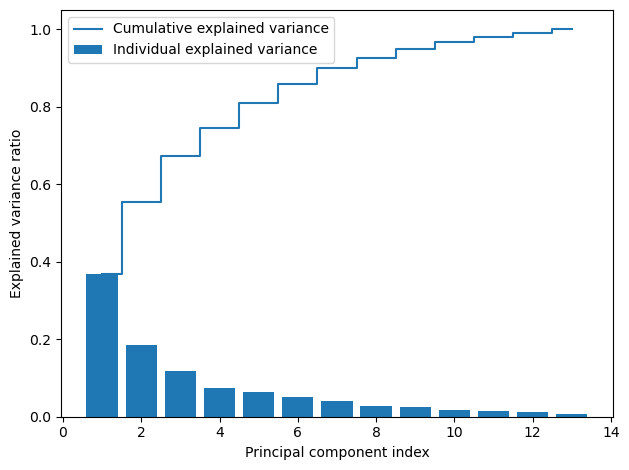

In [7]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### PCA w/ scikit learn

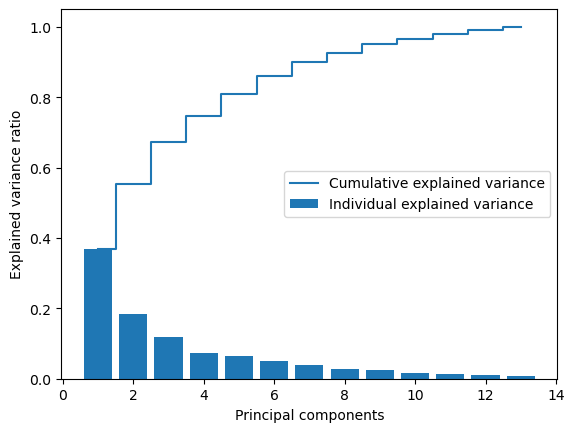

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

plt.bar(range(1, 14), pca.explained_variance_ratio_, align='center',label='Individual explained variance')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()

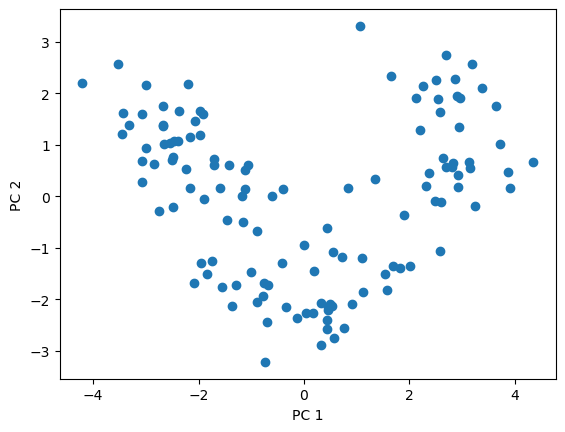

In [18]:
# PLOTTING NEW 2D VERSION OF ORIGINIAL DATASET

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [19]:
# DECISION REGION FUNCTION

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

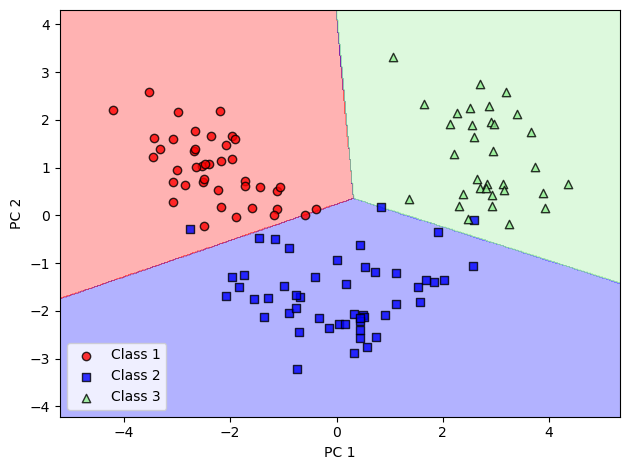

In [21]:
# LOGISTIC REGRESSION TRAINING + PLOT

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

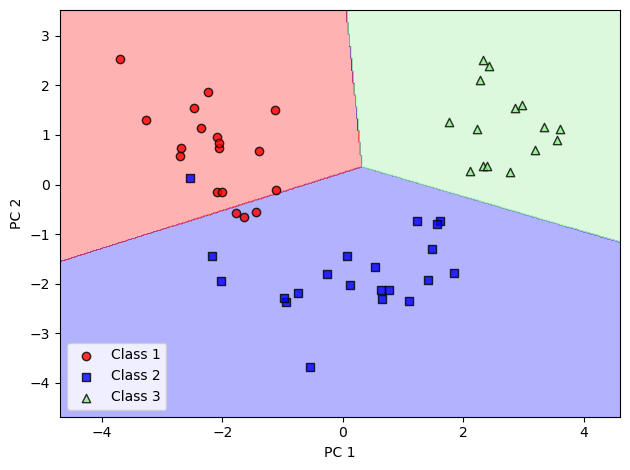

In [23]:
# LR TEST + PLOT

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_05.png', dpi=300)
plt.show()

You can see here that the logistic regression worked pretty well on the more simple 2D dataset

#### Assessing Feature contributions/loadings (of PCAs)

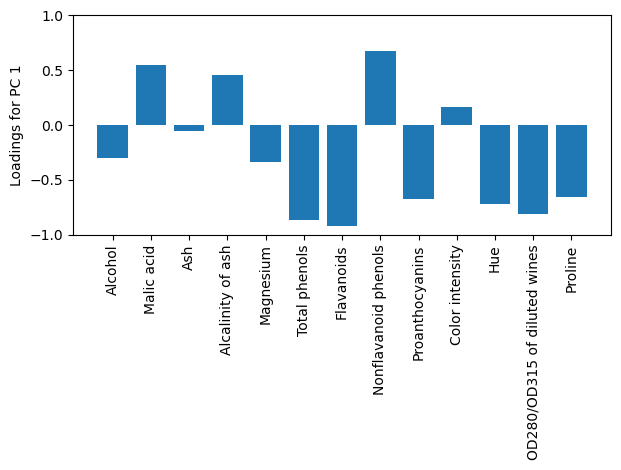

In [33]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### Linnear Discriminant Analysis

- Type of linear transformation technique
    - reduces the number of dimensions in a dataset
    - Supervised (as opposed to Principal Component Analysis, which is unsupervised)
- ASSUMPTIONS: 
    - data is normally distributed (so have to standardize all X_data before using it with LDA)
    - Classes have identical covariance matrices
    - training examples are statistically independent of each other
- LDA can still work reasonably well if one assumption is slightly violated
    - No big violations, or of 1+ violations


#### LDA with Scikit-learn

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train) #have to FIT the the lda algorithm to the og dataset, and then also TRANSFORM it
# X_data also has to be standardized for the same reasons as PCA

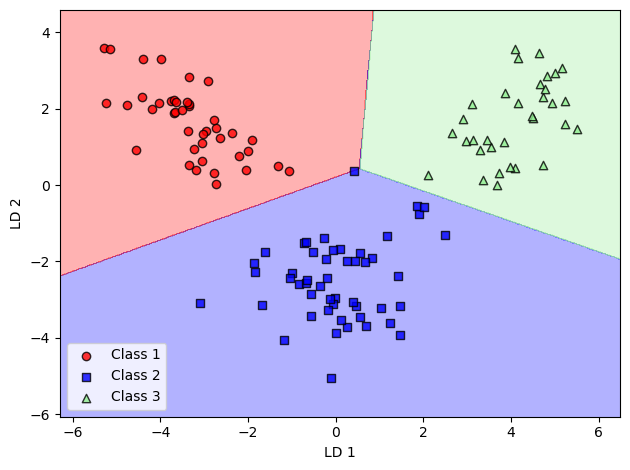

In [38]:
# TRAINING + PLOT

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1,solver='lbfgs')
lr = lr.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda,y_train,classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

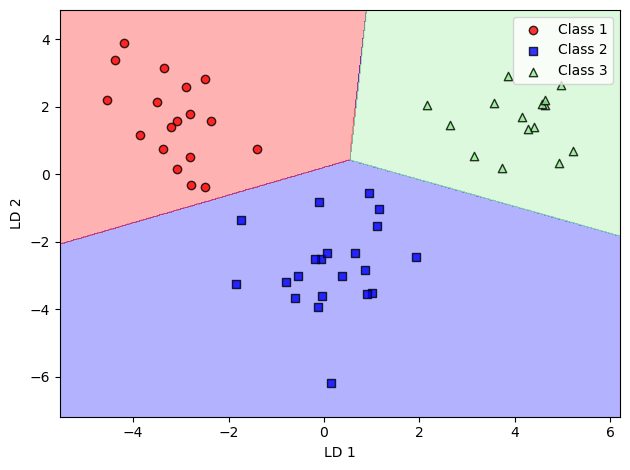

In [40]:
# TESTING + PLOT

X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda,y_test,classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Perfect score!!

### t-distributed stochastic neighbor embedding

Can't be applied to new data points
- Projects the entire dataset at once
